**Upload dataset**


In [1]:
from google.colab import files
uploaded = files.upload()


Saving Housing.csv to Housing.csv


**Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


**Load dataset and preprocessing**

In [3]:
df = pd.read_csv('Housing.csv')
print("Missing values:\n", df.isnull().sum())
print("\nFirst 5 rows of the dataset:")
print(df.head())
df = pd.get_dummies(df, drop_first=True)
print("\nDataset columns:\n", df.columns)


Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes    

**Correlation heatmap**

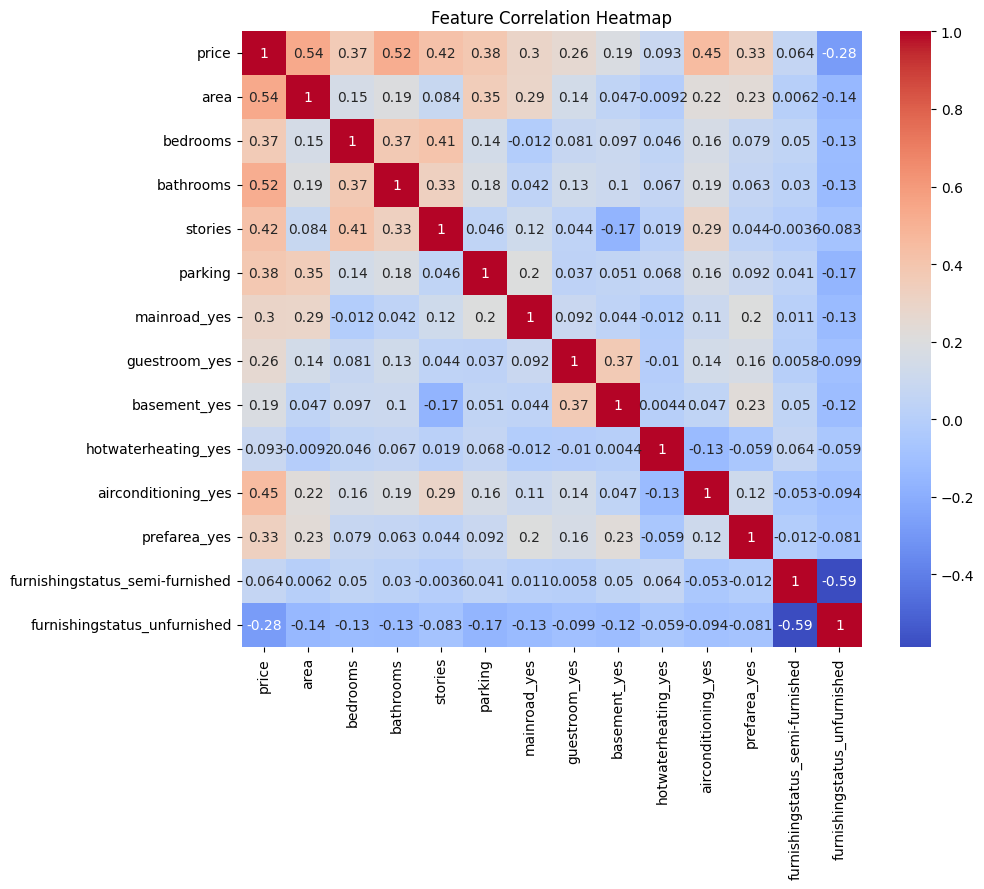

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


 **Multiple linear regression (Train/Test Split + Train)**

In [5]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Evaluate multiple linear regression**

In [6]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation Metrics (Multiple Linear Regression):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



Model Evaluation Metrics (Multiple Linear Regression):
Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
Root Mean Squared Error (RMSE): 1324506.96
R² Score: 0.65


**Model coefficients**

In [7]:
print("\nModel Coefficients:")
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coef_df)
print(f"\nIntercept: {model.intercept_}")



Model Coefficients:
                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05

Intercept: 260032.35760741215


**Simple Linear Regression (Area vs Price)**

In [8]:
X_simple = df[['area']]
y_simple = df['price']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)
simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)


LinearRegression()

**Simple regression evaluation**

In [9]:
y_pred_s = simple_model.predict(X_test_s)
print("\nSimple Regression Metrics (Area vs Price):")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_s, y_pred_s):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_s, y_pred_s):.2f}")
print(f"R² Score: {r2_score(y_test_s, y_pred_s):.2f}")



Simple Regression Metrics (Area vs Price):
Mean Absolute Error: 1474748.13
Mean Squared Error: 3675286604768.19
R² Score: 0.27


**Plot simple regression line**

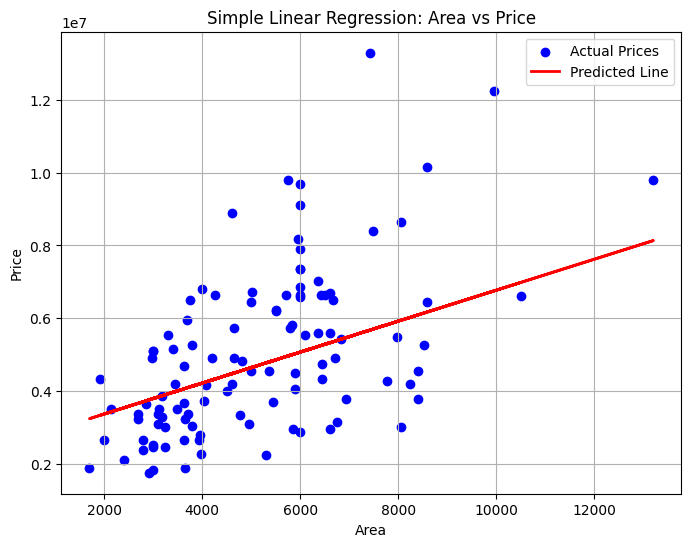

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual Prices')
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Predicted Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.grid(True)
plt.show()
